In [2]:
import numpy as np
import pandas as pd


In [6]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
#df['job'].unique()
#df['marital'].unique()
#df['loan'].unique()
#df['default'].unique()
df['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

In [16]:
#To check the information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [17]:
#To see the statistical result of data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
#To ckeck the whether the dataset contain any missing or null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
# if any missing or null value that can be handled by  fillna method
#df.fillna(df['age'].mean())

In [29]:
#Printing unique values of categorical columns 
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
for col in cols:
    print('There are {} unique values in column, "{}"'.format(df[col].nunique(), col))
    print('Unique values of column, "{}": {}'.format(col, df[col].unique()))

There are 12 unique values in column, "job"
Unique values of column, "job": ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
There are 3 unique values in column, "marital"
Unique values of column, "marital": ['married' 'single' 'divorced']
There are 4 unique values in column, "education"
Unique values of column, "education": ['secondary' 'tertiary' 'primary' 'unknown']
There are 2 unique values in column, "default"
Unique values of column, "default": ['no' 'yes']
There are 2 unique values in column, "housing"
Unique values of column, "housing": ['yes' 'no']
There are 2 unique values in column, "loan"
Unique values of column, "loan": ['no' 'yes']
There are 3 unique values in column, "contact"
Unique values of column, "contact": ['unknown' 'cellular' 'telephone']
There are 12 unique values in column, "month"
Unique values of column, "month": ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan

In [33]:
df.corr()


,age,job,balance,day,campaign,pdays,previous
age,1.000000,-0.031603,0.112300,-0.000762,-0.005278,0.002774,0.020169
job,-0.031603,1.000000,0.028736,0.026589,0.003104,-0.003385,0.012665
balance,0.112300,0.028736,1.000000,0.010467,-0.013894,0.017411,0.030805
day,-0.000762,0.026589,0.010467,1.000000,0.137007,-0.077232,-0.058981
campaign,-0.005278,0.003104,-0.013894,0.137007,1.000000,-0.102726,-0.049699
pdays,0.002774,-0.003385,0.017411,-0.077232,-0.102726,1.000000,0.507272
previous,0.020169,0.012665,0.030805,-0.058981,-0.049699,0.507272,1.000000


In [34]:
#label encoding for the  data because we have convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
print(df['job'].value_counts())
df

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,0,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,0,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,9,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,7,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,0,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,7,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,9,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,9,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


In [36]:
#label encoding for the  data because we have convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['marital']=le.fit_transform(df['marital'])
print(df['marital'].value_counts())
df

1    6351
2    3518
0    1293
Name: marital, dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,41,0,1,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,38,0,1,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,23,9,1,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,37,7,1,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,36,0,1,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,21,7,1,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,14,9,2,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,25,9,1,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have varianc

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for 

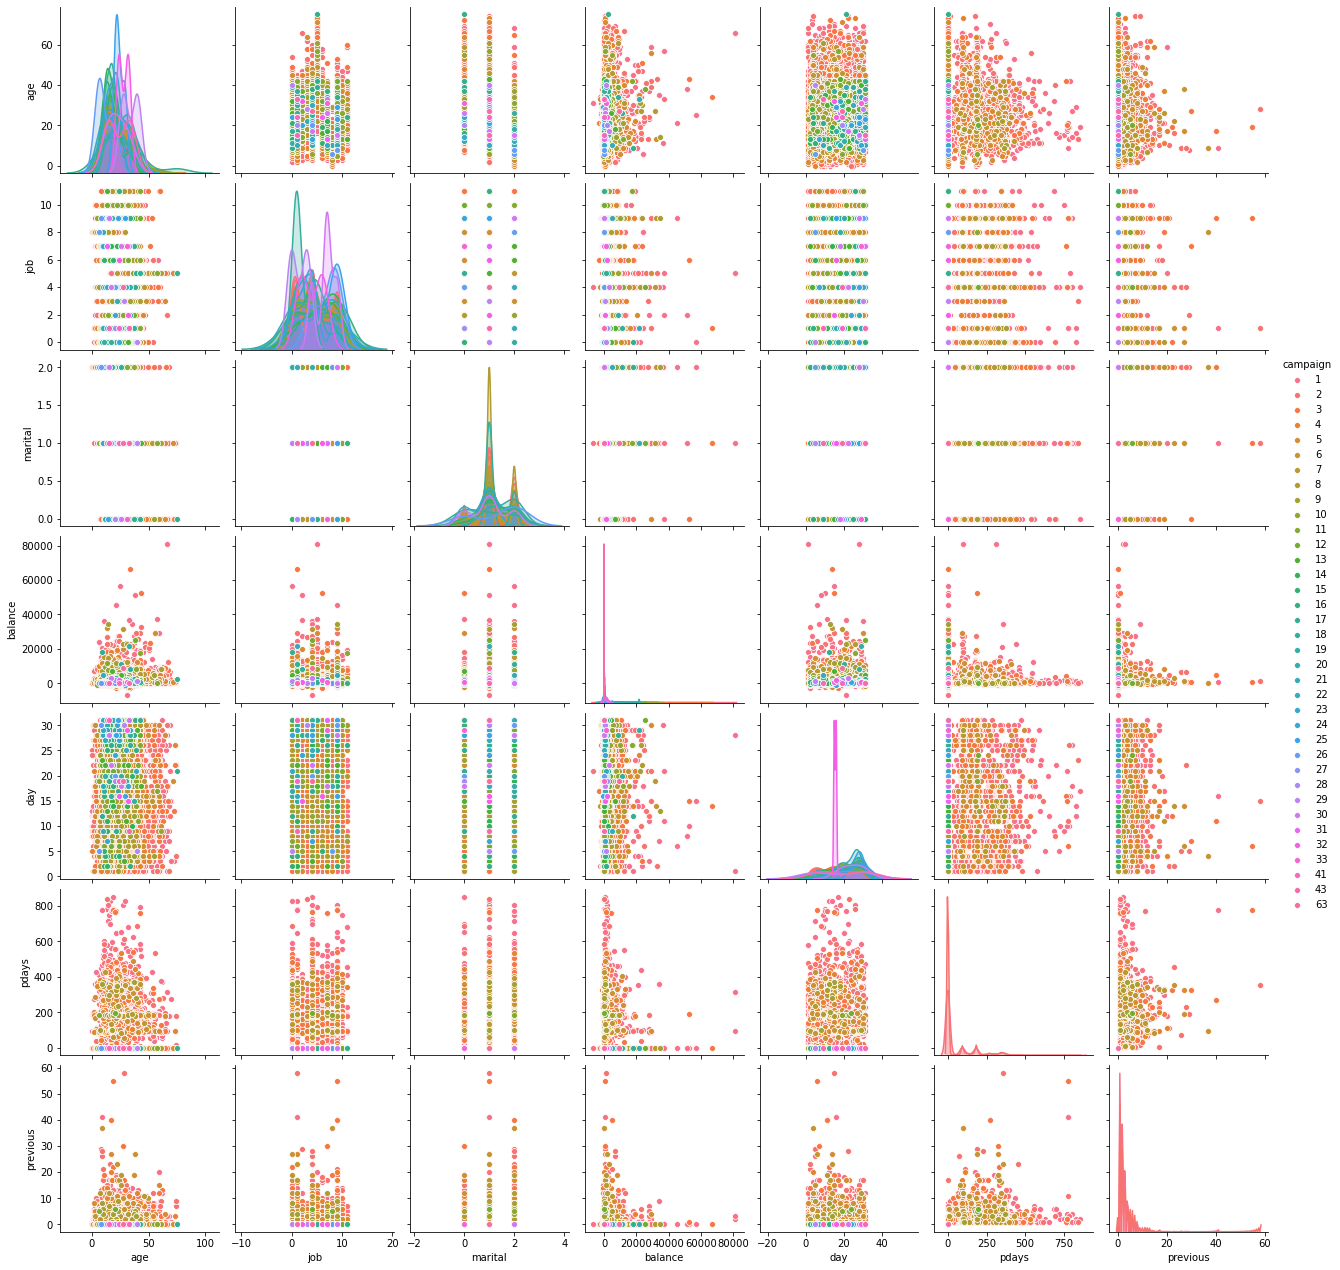

In [38]:
import seaborn as sns
sns.pairplot(df,hue='campaign')